<a href="https://colab.research.google.com/github/eaguilar98/encuesta/blob/main/encuesta_ejercicio_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hace muchos ayeres

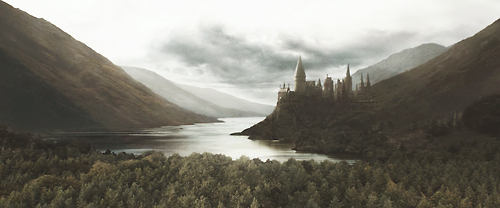

La noche se acerca, un grupo de estudiantes llenaron una encuesta con el objetivo de comprobar ciertas hipótesis, pero las cosas han cambiado.

Un solo resultado: [Datos](https://docs.google.com/spreadsheets/d/1NsUaWlGdSug7PfXjcAFRfADRQuROUfyDQJwVvXcrJhc/edit?usp=sharing)

Fascinante, sin embargo, lo que no esperaban es que dos de esas respuestas las escribieron sus Senseis que ahora necesitan ser rescatados.

Funciones, ciclos, condicionales, necesitarán toda la ayuda posible.

Y ahora tendrán que emprender una aventura en donde usarán los datos para hacer equipos y encontrar a sus Senseis

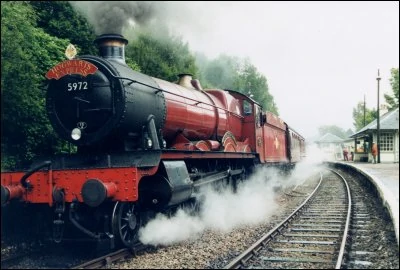

Antes de desaparecer estas fueron sus últimas palabras:

Mi fortuna es de quien la quiera pero tendrán que rescatarnos primero, dejé todo lo que poseo escondido en una sola pieza. (Si se preguntan cuál es el tesoro, es un CV que tuvo el VoBo para entrar a Amazon)

# Instrucciones

1.   Diseñar un algoritmo/función que les ayude a encontrar a la persona que más se parece a ustedes de acuerdo a lo que respondieron en la encuesta. (Tiene que funcionar para cualquiera que la haya contestado)

2.   Enontrar a los senseis en la encuesta, hay pistas escondidas y puede que haya un impostor OMG, cuidado.


##Notas:
*El algoritmo que construyan se probará con todos en la encuesta.
Tienen 3 oportunidades para decir quienes de los que respondieron la encuesta son los senseis (ej. Eru, Abc)
Pueden trabajar en equipos de entre 1 y 15 personas, por cada integrante extra en su equipo tendrán una oportunidad más, máximo 5 oportunidades.
Tienen 1 semana (miércoles 20 a media noche)*

# Work with Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file="/content/drive/MyDrive/DEV.F/encuesta/Copia de Ejercicio - ¿Cómo formular buenas preguntas_  (Respuestas) (1).csv"

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [ ]:
df1=pd.read_csv(file)

In [ ]:
columnas={
    "Escribe un alias de al menos 3 caracteres (Sólo tú sabrás quién eres)":"alias",
    "¿Cuál es tu género?":"genero",
    "Cuál es tu rango de edad":"rango_edad",
    "¿Qué porcentaje del tiempo te consideras introvertido/a? [Intro]":"p_introvertido",
    "¿Qué porcentaje del tiempo te consideras introvertido/a? [Extro]":"p_extrovertido",
    "¿Cuántas horas duermes en promedio en una semana?":"hrs_dormir",
    "¿A qué hora te acuestas en promedio en una semana?":"a_dormir",
    "¿Cuántos países has visitado?":"paises",
    "En la escala del 1 al 5 ¿Qué nivel de inseguridad sientes al vivir en tu país de nacimiento? (1 muy seguro - 5 muy inseguro)":"inseguridad",
    "¿En qué estado (geográfico) has vivido la mayor parte de tu vida?":"estado",
    "¿Cuántas frutas comes en un día?":"frutas",
    "Escoge uno":"mascota",
    "Nombra tus 3 shows, series, películas o animes favoritos separados por comas (Ej. Harry Potter, Game of Thrones, Pokémon)":"series",
    "¿Qué otra pregunta te gustaría incluir?":"otra_pregunta"
}

In [ ]:
df1.rename(columns=columnas, inplace=True)

In [ ]:
df2=df1.copy()

In [ ]:
#clean data
df2['alias']=df2["alias"].str.lower()
df2['genero']=df2["genero"].str.lower()
df2['estado']=df2["estado"].str.lower()
df2['series']=df2["series"].str.lower()
df2['otra_pregunta']=df2["otra_pregunta"].str.lower()
df2['mascota']=df2["mascota"].str.lower()

In [ ]:
#clean data
df2["rango_edad"].fillna('0-20', inplace=True)
df2["p_introvertido"].fillna("0%", inplace=True)
df2["p_extrovertido"].fillna("0%", inplace=True)
df2["paises"].fillna(0, inplace=True)
df2["frutas"].fillna(0, inplace=True)
df2["series"].fillna(',,,', inplace=True)
df2["otra_pregunta"].fillna('ninguna', inplace=True)

In [ ]:
def codificar_etiquetas(columna,df):
    label_encoding = preprocessing.LabelEncoder()
    datos=df2[columna].unique()
    label_encoding= preprocessing.LabelEncoder()
    label_encoding = label_encoding.fit(datos)
    df[columna+'_level'] = label_encoding.transform(df[columna].astype(str))

In [ ]:
codificar_etiquetas('rango_edad',df2)
codificar_etiquetas('genero',df2)
codificar_etiquetas('p_introvertido',df2)
codificar_etiquetas('p_extrovertido',df2)
codificar_etiquetas('mascota',df2)

In [ ]:
df2['series']=df2['series'].str.strip()
df2['series']=df2['series'].str.lower()

In [ ]:
#move series to another data frame
df_series=df2['series'].str.split(',',n=2,expand=True)

In [ ]:
df_series[0].unique()

array(['game of throne', 'naruto', 'how i metí your mother', 'star wars',
       'one piece', 'game of thrones', 'modern family',
       'your lie in april', 'theory big bang', 'evangelion',
       'breaking bad', 'the big bang theory', 'californication',
       'the end of the f***ing world', 'reservoir dogs', 'harry potter',
       'himym', 'bojack horseman', 'arcane',
       'full metal alchemist brotherhood', 'got', 'mr robot',
       'jujutsu kaisen', 'pokemon', 'futurama', '', 'f1', 'vikings',
       'kobra kai', 'the office', 'dragon ball z', 'slime',
       'dragon ball super', 'loki'], dtype=object)

In [ ]:
#clean data
df_series[0]=df_series[0].apply(lambda x: x.replace("dragon ball z","dragon ball"))
df_series[0]=df_series[0].apply(lambda x: x.replace("dragon ball super","dragon ball"))
df_series[0]=df_series[0].apply(lambda x: x.replace("game of throne","got"))
df_series[0]=df_series[0].apply(lambda x: x.replace("game of thrones","got"))
df_series[0]=df_series[0].apply(lambda x: x.replace("Game of thrones","got"))
df_series[0]=df_series[0].apply(lambda x: x.replace("Game of throne","got"))
df_series[0]=df_series[0].apply(lambda x: x.replace("gots","got"))
df_series[0]=df_series[0].apply(lambda x: x.replace("theory big bang","the big bang theory"))
df_series[0]=df_series[0].apply(lambda x: x.replace("how i metí your mother","how i meet your mother"))
df_series[0]=df_series[0].apply(lambda x: x.replace("the end of the f***ing world","the end of the fucking world"))

In [ ]:
df_series[1].unique()

array([' los simpsons', ' one piece', ' breaking bad', ' the expanse',
       ' the office', ' euphoria', ' breakfast at tiffany’s',
       ' the mentalist', ' narcos', ' how i meet your mother',
       " ellen's show", ' pokémon', ' dragon ball y star wars',
       ' full metal alchemist', ' the lord of the rings',
       ' batman el caballero de la noche', ' rick & morty',
       ' the truman show', ' pulp fiction', ' aot', ' harry potter',
       ' sueño en otro idioma', ' better call saul',
       ' assassination classrom', ' terminator sarah connor chronicles',
       ' naruto', ' samuray x', ' fundación', '', ' avengers',
       ' game of thrones', ' spiderman', ' dr. house', ' dragon ball z',
       ' peaky blinders', ' the big bang theory',
       ' pokémon y blue mountain state', 'hannibal', 'one piece',
       ' death note', ' son como niños', ' cowboy bebop'], dtype=object)

In [ ]:
#clean data
df_series[1]=df_series[1].apply(lambda x: x.replace("dragon ball z","dragon ball"))
df_series[1]=df_series[1].apply(lambda x: x.replace("game of thrones","got"))

In [ ]:
#clean data
df_series[2].fillna('ninguno', inplace=True)

In [ ]:
df_series[2].unique()

array([' harry potter', ' demon slayer', ' death note', ' macross',
       ' shingeki no kiojin', 'dragon ball', ' bones', ' quién da más',
       ' star wars, miraculous', ' el tesoro perdido',
       ' parks and recreation', 'ninguno', ' the office', ' naruto.',
       ' the amazing spider-man', ' malcolm in the middle', ' lolita',
       ' about time', ' la propuesta', ' perfec blue', ' anne with an e',
       ' in time', ' game of thrones', ' saint seiya',
       ' el club de la pelea', ',', ' star wars,', ' peaky blinders',
       ' loki', ' pokémon', ' brother bear', ' the good doctor',
       ' lord of the rings', ' digimon adventure', 'star wars', ' naruto',
       ' yu-gi-oh', ' overlord',
       ' eterno resplandor de una mente sin recuerdos'], dtype=object)

In [ ]:
#clean data
df_series[2]=df_series[2].apply(lambda x: x.replace("game of thrones","got"))

In [ ]:
df_series[0]=df_series[0].str.strip()
df_series[1]=df_series[1].str.strip()
df_series[2]=df_series[2].str.strip()

In [ ]:
# concat two frames in one frame
df2=pd.concat([df2,df_series],axis=1)

In [ ]:
columnas={0:"serie1",1:"serie2",2:"serie3"}
df2.rename(columns=columnas, inplace=True)

In [ ]:
#show data
df2[['alias','serie1','serie2','serie3']]

,alias,serie1,serie2,serie3
0,yuma,got,los simpsons,harry potter
1,g,naruto,one piece,demon slayer
2,kr,how i meet your mother,breaking bad,death note
3,el inge,star wars,the expanse,macross
4,edificio,one piece,the office,shingeki no kiojin
5,alf,got,euphoria,dragon ball
6,ricksi,got,breakfast at tiffany’s,harry potter
7,mapa,modern family,the mentalist,bones
8,fro,naruto,narcos,quién da más
9,tiki,your lie in april,how i meet your mother,"star wars, miraculous"


In [ ]:
def best_dude(alias, df): 
    dudes={}   

    xedad=int(df[df['alias']==alias]['rango_edad_level'])
    xintro=int(df[df['alias']==alias]['p_introvertido_level'])
    xextro=int(df[df['alias']==alias]['p_extrovertido_level'])
    xmascota=int(df[df['alias']==alias]['mascota_level'])   

    # Principales ------
    yedad=0
    diff_edad=0
    diff_intro=0
    diff_extro=0
    diff_mascota=0
    #-----------------   
    total=0

    for index, row in df.iterrows():
        if row['alias']!=alias:        
            diff_edad=abs(xedad-int(row['rango_edad_level']))
            diff_intro=abs(xintro-int(row['p_introvertido_level']))
            diff_extro=abs(xextro-int(row['p_extrovertido_level']))
            diff_mascota=abs(xmascota-int(row['mascota_level']))            
            total=diff_edad+diff_intro+diff_extro+diff_mascota  
            dudes[row['alias']]=total

    df_dudes = pd.DataFrame(list(dudes.items()),columns = ['alias','cerca']) 
    df_dudes=df_dudes[df_dudes['cerca']<=2].sort_values(by="cerca")

    return df_dudes

# Find best dude

In [ ]:
xalias='lis'
df_dudes=best_dude(xalias,df2)
df_dudes.head

<bound method NDFrame.head of       alias  cerca
22      ola      1
3   el inge      2
9     tiki       2
11      ghr      2
23      cvz      2
32      asd      2
40      jsp      2>

In [ ]:
alias_cerca=df_dudes.sort_values(by='cerca')['alias'].to_list()
print(df2[df2['alias']==xalias][['serie1','serie2','serie3']])
print("-----------------------")
for alias in alias_cerca:
    print(df2[df2['alias']==alias][['alias','serie1','serie2','serie3']])
    print("-----------------------")

  serie1                  serie2        serie3
6    got  breakfast at tiffany’s  harry potter
-----------------------
   alias   serie1 serie2          serie3
31   axl  vikings    got  peaky blinders
-----------------------
  alias                  serie1        serie2      serie3
2    kr  how i meet your mother  breaking bad  death note
-----------------------
    alias serie1        serie2        serie3
20  flavy  himym  harry potter  la propuesta
-----------------------
   alias    serie1                              serie2   serie3
25  redo  mr robot  terminator sarah connor chronicles  in time
-----------------------
   alias  serie1     serie2   serie3
34   har  naruto  dr. house  pokémon
-----------------------
     alias    serie1          serie2   serie3
36  poncho  mr robot  peaky blinders  in time
-----------------------
   alias       serie1  serie2             serie3
40   arr  dragon ball  naruto  digimon adventure
-----------------------
    alias               serie1    

# find the senseis

In [ ]:
df2[(df2['serie1']=='harry potter')|
    (df2['serie2']=='harry potter')|
    (df2['serie3']=='harry potter')]\
[['alias','genero','rango_edad','estado','paises','hrs_dormir','serie1','serie2','serie3','mascota']]

,alias,genero,rango_edad,estado,paises,hrs_dormir,serie1,serie2,serie3,mascota
0,yuma,femenino,25 - 29,cdmx,1,7,got,los simpsons,harry potter,perrito
6,ricksi,femenino,20 - 24,cdmx,2,8,got,breakfast at tiffany’s,harry potter,perrito
14,kdt,masculino,20 - 24,nuevo león,1,8,got,the lord of the rings,harry potter,gatito
19,aagc,masculino,20 - 24,sinaloa,2,6,harry potter,aot,about time,perrito
20,flavy,femenino,20 - 24,estado de méxico,1,Más de 10,himym,harry potter,la propuesta,gatito
23,cvz,masculino,25 - 29,puebla,2,6,full metal alchemist brotherhood,assassination classrom,harry potter,perrito
24,isan,prefiero no responder,20 - 24,cdmx,6,5,got,breaking bad,harry potter,perrito
37,heri,femenino,20 - 24,cdmx,6,7,harry potter,the big bang theory,the good doctor,gatito
38,lis,femenino,30 - 34,valle del cauca - colombia,4,8,got,harry potter,lord of the rings,gatito
42,ems,femenino,25 - 29,cdmx,1,Más de 10,harry potter,got,pokémon,gatito


senseis [ kdt, heri ]


In [ ]:
df2[(df2['estado']=='cdmx')]\
[['alias','genero','rango_edad','estado','paises','hrs_dormir','serie1','serie2','serie3','mascota']]

,alias,genero,rango_edad,estado,paises,hrs_dormir,serie1,serie2,serie3,mascota
4,edificio,masculino,25 - 29,cdmx,Más de 10,7,one piece,the office,shingeki no kiojin,perrito
6,ricksi,femenino,20 - 24,cdmx,2,8,got,breakfast at tiffany’s,harry potter,perrito
17,yoo,femenino,25 - 29,cdmx,1,7,the end of the fucking world,the truman show,malcolm in the middle,perrito
22,ola,femenino,25 - 29,cdmx,5,7,arcane,better call saul,anne with an e,gatito
24,isan,prefiero no responder,20 - 24,cdmx,6,5,got,breaking bad,harry potter,perrito
37,heri,femenino,20 - 24,cdmx,6,7,harry potter,the big bang theory,the good doctor,gatito
42,ems,femenino,25 - 29,cdmx,1,Más de 10,harry potter,got,pokémon,gatito
44,will smith,masculino,30 - 34,cdmx,1,Más de 10,dragon ball,death note,yu-gi-oh,perrito
